<a href="https://colab.research.google.com/github/Sharath2021/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#data path
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Capstone_EDA/Airbnb NYC 2019_data.csv")

In [7]:
#another copy of the data 
df_air=df.copy()

In [8]:
#data overview
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Now we'll see the data types of entries and null values in our columns.

In [ ]:
#data info
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
#total number of null values present
df_air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
# checking duplicate values
len(df_air[df_air.duplicated()])

0

> Total entries are 48895

> 4 columns with **null values** :  *name, host_name, last_review and reviews_per_month*

> No duplicated values are present







---



After analysing the dataset, the column **last_review** was found not needed for any further analysis

In [10]:
#droping the column last_review
df_air.drop(['last_review'],axis=1,inplace=True)

In [11]:
#fill all Nan values in reviews_per_month with 0
df_air['reviews_per_month']=df.reviews_per_month.fillna(0)
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

We can fill the null values in host_name and name with something but we won't, so we can use the methods related to NaN values (isna/dropna) directly if and when we need to.

In [12]:
#Statistics of the data set
df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


> The minimum price is found to be zero, which cannot be possible. So changing the minimum price to 20$, which is the least







We can see the median price is $106, so next we will change all the values below 20 with our median in *price* column.

In [13]:
#this shows a very small percent of rooms are listed below $20, so our assumption is sutainable for this data.
len(df_air['price'][df_air['price']<=20])

87

In [14]:
#changing all the values below 20
df_air['price'][df_air['price']<=20]=106

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [ ]:
df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.884303,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.090787,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,21.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Data Exploration is DONE**


**Let's START Data Analysis**

# **Room types - mean price and which type is booked the most**

In [19]:
#find mean price for each room type
price_roomtype=df_air.groupby(['room_type'])['price'].mean().reset_index()
price_roomtype

,room_type,price
0,Entire home/apt,211.868472
1,Private room,89.911269
2,Shared room,72.890517


So the Entire home/apt is the expensive one as it has more amenities, followed by a private room and the shared rooms lesser than the former rooms

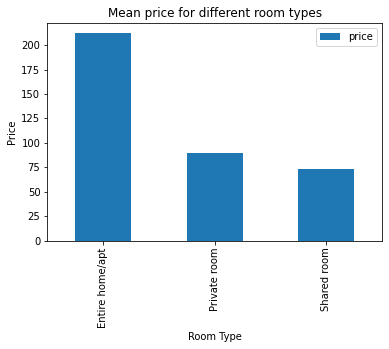

In [20]:
price_roomtype.plot(kind='bar', x='room_type',y='price',xlabel='Room Type',ylabel='Price')
plt.title('Mean price for different room types')
plt.show()

Most wished Room type is Entire home/apt followed by private room and shared room, from the number of reviews present.

In [21]:
#find traffic per room type
df_air.groupby('room_type')['number_of_reviews'].sum().to_frame()

,number_of_reviews
room_type,
Entire home/apt,580403
Private room,538346
Shared room,19256


> It's clear that entire home/apt is the most wished/booked, followed by private room and shared room

> From this we can infer that, when people go on vacation with their loved ones they prefer staying in an Entire home/Apartment followed by a private room, who wish for some privacy.

> And people on a budget prefer shared rooms










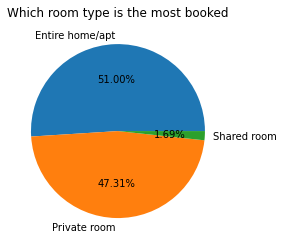

In [23]:
#pie plot of most booked room type 
rt_rev=df_air.groupby('room_type')['number_of_reviews'].sum()
rt_rev.plot(kind='pie',autopct='%1.2f%%',ylabel='',title='Which room type is the most booked')

plt.show()

# **Room type, price and booking analysis for each neighbourhood group**


---
Now we will see if our above analysis is true for each neighbourhood group or is there a group that does not agree with the general trend.
Hopefully we will be able to gather some more findings using these plots.


In [25]:
#mean price for each room type in all neighbourhood groups
df_air.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,67.098160,68.400000
Brooklyn,178.397531,76.668377,54.406780
Manhattan,249.296538,116.868579,89.556250
Queens,147.269561,71.816429,72.202020
Staten Island,173.846591,62.750000,77.333333


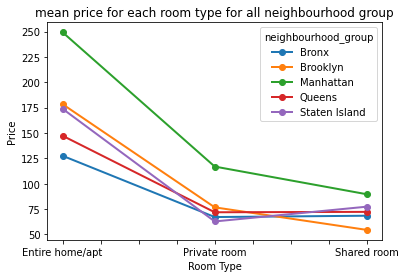

In [26]:
price_by_nbh_g=df_air.groupby(['room_type','neighbourhood_group'])['price'].mean().unstack()
price_by_nbh_g.plot(linewidth=2,markersize=6,marker='o',xlabel='Room Type',ylabel='Price',title='mean price for each room type for all neighbourhood group')


All the groups have Entire home/apt as the most expensive commodity. Manhattan and Brooklyn agree with the general price trend completely, while for Bronx and Queens, the price for shared rooms and private rooms are almost equal and we see a trend reversal in the price of shared rooms and private rooms in Staten Island.

---


We can also see that Manhattan is the most expensive for all room types by a considerable margin. 

Now let's figure out which neighbourhood group  has the most bookings for each room type.

In [27]:
#footfall for each room type in all neighbourhood groups
df_air.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,11627,16312,432
Brooklyn,267128,213653,5793
Manhattan,235147,209150,10272
Queens,60644,93561,2745
Staten Island,5857,5670,14


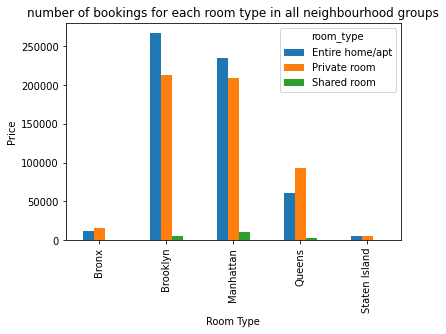

In [28]:
nbh_g_rt_rev=df_air.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().unstack()

nbh_g_rt_rev.plot(kind='bar',xlabel='Room Type',ylabel='Price',title='number of bookings for each room type in all neighbourhood groups')

Brooklyn, Manhattan and Staten Island agree with the general trend while in Queens and Bronx private rooms are booked the most.

Though it's not exactly represented in the chart but just by looking at the height of the bars, we can easily see that Brooklyn and Manhattan are the 2 most visited neighbourhood groups, which may be because of any number of reasons like climate, landscape, connectivity,etc. Manhattan is still the second most visited neighbourhood group even though it is the most expensive. We can concur that Manhattan is the favourite here.

Let's analyze the top two groups-

Brooklyn is leading in private rooms and apartments, the obvious reason for that is the cost difference between the two. We can also argue that maybe if prices are reduced in Manhattan, it may see more footfall.

# **Availability-Price correlation**

To find out the correlation between mean availablity and price considering all neighbourhood groups.

In [29]:
#mean availability and price for each neighbourhood group
nbh_g_min_night_price_corr=df_air.groupby('neighbourhood_group')['availability_365','price'].mean().reset_index()
nbh_g_min_night_price_corr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,neighbourhood_group,availability_365,price
0,Bronx,165.758937,88.154904
1,Brooklyn,100.232292,124.580979
2,Manhattan,111.979410,196.957527
3,Queens,144.451818,99.741970
4,Staten Island,199.678284,115.522788


In [30]:
#correlation between availability and price
df_corr=nbh_g_min_night_price_corr.corr()
df_corr

,availability_365,price
availability_365,1.00000,-0.52724
price,-0.52724,1.00000


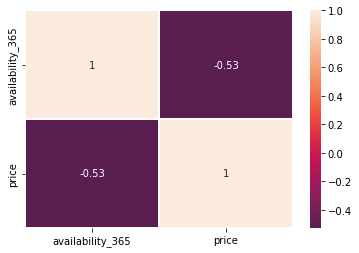

In [58]:
sns.heatmap(df_corr,annot=True,center=0,linewidth=0.5,cmap='rocket')

This heatmap shows us a moderately negative correlation between price and availability, which was expected as low supply and high demand means higher price.





# **Location and number of rooms in each neighbourhood group**

[Text(0.5, 1.0, 'Location of properties in all neighbourhood groups')]

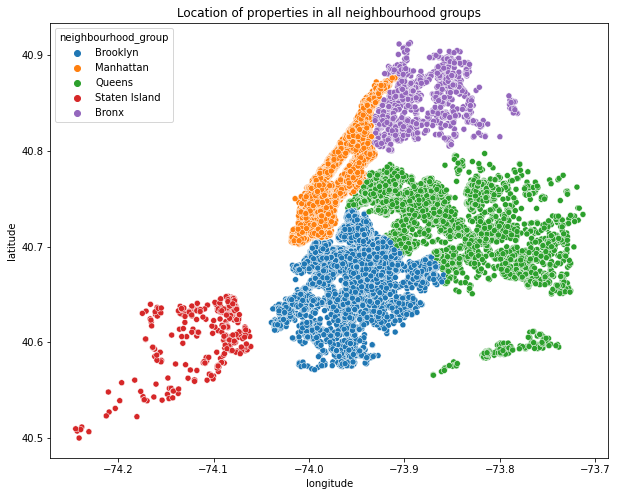

In [32]:
#plotting all the listings using latitude and longitude
plt.figure(figsize=(10,8))
ax=sns.scatterplot(x="longitude",y="latitude",data=df_air,hue="neighbourhood_group")
ax.set(title='Location of properties in all neighbourhood groups')

To understand the relative density of all the neighbourhood groups, we'll see just how many rooms each group has.

In [33]:
#number of listings in all neighbourhood groups
df2=df_air.groupby('neighbourhood_group')['id'].count().to_frame().reset_index()
df2

,neighbourhood_group,id
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


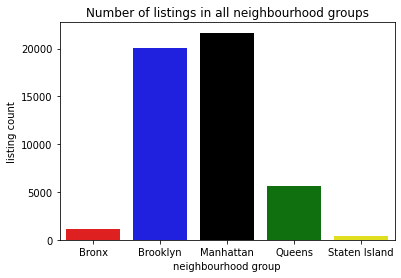

In [35]:
#distribution of listings
ax=sns.barplot(y="id",data=df2,x="neighbourhood_group",palette=['red','blue','black','green','yellow']) 
ax.set(xlabel="neighbourhood group",ylabel="listing count",title='Number of listings in all neighbourhood groups')
plt.show()

With less area and the highest number of properties, Manhattan is the most dense of all.

Based on our current and previous plots, we can concurr here that Manhattan, despite having the highest number of listings, still has the highest price, shows high demand for this group.

# **Successful host**

To find the most successful host, we have to see which host owns the most number of properties. More properties means better financial source and more cashflow, which in turn makes a business more profitable and successful.


In [36]:
#finding host with most listings
most_successful_host=df_air[df_air['calculated_host_listings_count']==df_air['calculated_host_listings_count'].max()].reset_index()

In [37]:
#most successful host name
most_successful_host['host_name'][0]

'Sonder (NYC)'

So **Sonder(NYC) is the most successful host**. But WHY??

In [38]:
most_successful_host['neighbourhood_group'].unique()

array(['Manhattan'], dtype=object)

In [39]:
most_successful_host['room_type'].unique()

array(['Entire home/apt', 'Private room'], dtype=object)

Our data shows that Sonder (NYC) has listings only in Manhattan with just private rooms and apartments. They deal with the most expensive aspect of the business, hence posses more money, which in turn increases their number of listings.

# **Most expensive neighboorhood in each neighbourhood groups**

> To find out the most expensive neighbourhood in each neighbourhood groups





In [47]:
#unique neighbourhood groups
df_air.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [55]:
#spliting all the neighbourhood groups 
df_brook  =  df_air[df_air['neighbourhood_group']=='Brooklyn']
df_man    =  df_air[df_air['neighbourhood_group']=='Manhattan']
df_queens =  df_air[df_air['neighbourhood_group']=='Queens']
df_si     =  df_air[df_air['neighbourhood_group']=='Staten Island']
df_bronx  =  df_air[df_air['neighbourhood_group']=='Bronx']

In [56]:
#finding the mean price for all neighbourhoods per group
brook_most_exp_nbh  =  df_brook.groupby('neighbourhood')['price'].mean().reset_index()
man_most_exp_nbh    =  df_man.groupby('neighbourhood')['price'].mean().reset_index()
queens_most_exp_nbh =  df_queens.groupby('neighbourhood')['price'].mean().reset_index()
si_most_exp_nbh     =  df_si.groupby('neighbourhood')['price'].mean().reset_index()
bronx_most_exp_nbh  =  df_bronx.groupby('neighbourhood')['price'].mean().reset_index()

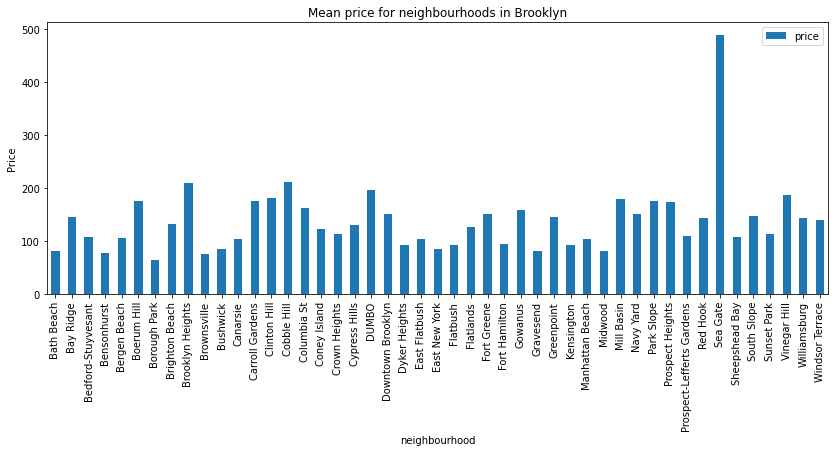

In [57]:
#Brooklyn
brook_most_exp_nbh.plot(x='neighbourhood',y='price',kind='bar',figsize=(14,5),ylabel='Price',title='Mean price for neighbourhoods in Brooklyn')  

**The most expensive neighbourhood in Brooklyn is Sea Gate.**

[]

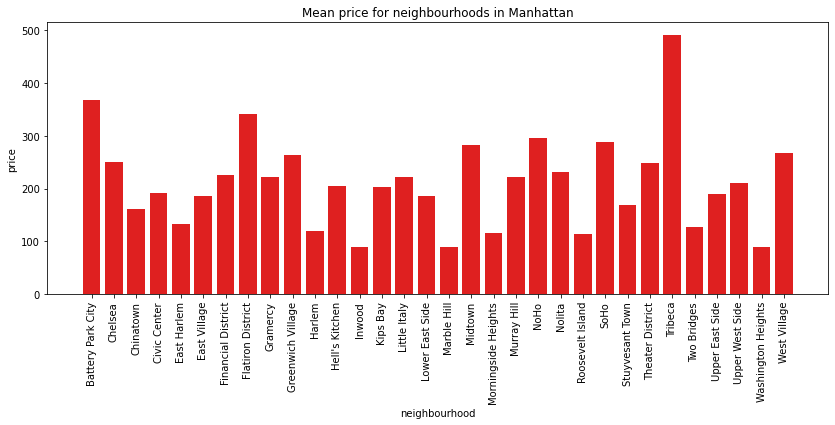

In [51]:
#Manhattan
plt.figure(figsize=(14,5))
z=sns.barplot(x='neighbourhood',y='price',data=man_most_exp_nbh,color='red')
plt.xticks(rotation=90)
plt.title('Mean price for neighbourhoods in Manhattan')
z.plot()

**The most expensive neighbourhood in Manhattan is Tribeca.**

[]

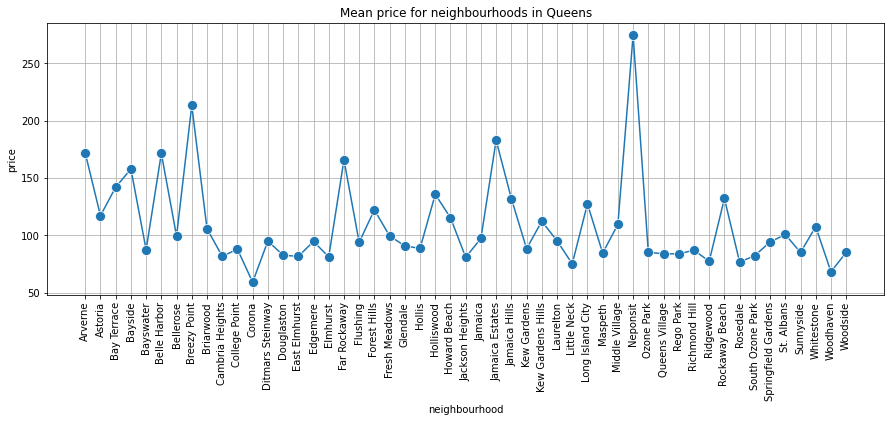

In [52]:
#Queens
plt.figure(figsize=(15,5))
ax=sns.lineplot(x='neighbourhood',y='price',data=queens_most_exp_nbh,marker='o',markersize=10)
plt.title('Mean price for neighbourhoods in Queens')
plt.xticks(rotation=90)
plt.grid()
ax.plot()

**The most expensive neighbourhood in Queens is Neponsit.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


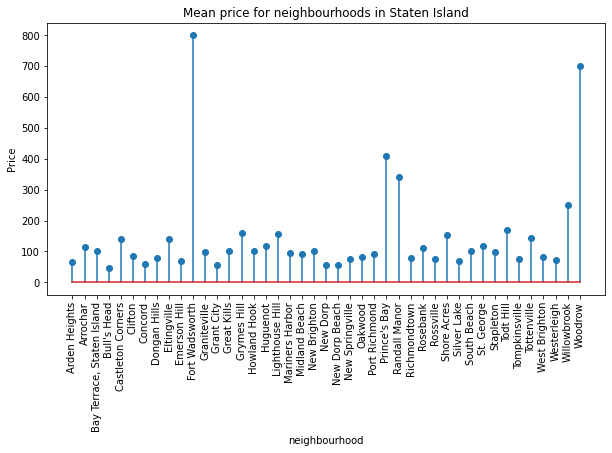

In [53]:
#Staten Island
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.stem('neighbourhood','price',data=si_most_exp_nbh)
plt.xlabel('neighbourhood')
plt.ylabel('Price')
plt.title('Mean price for neighbourhoods in Staten Island')
plt.show()

**The most expensive neighbourhood in Staten Island is Fort Wadsworth.**

[]

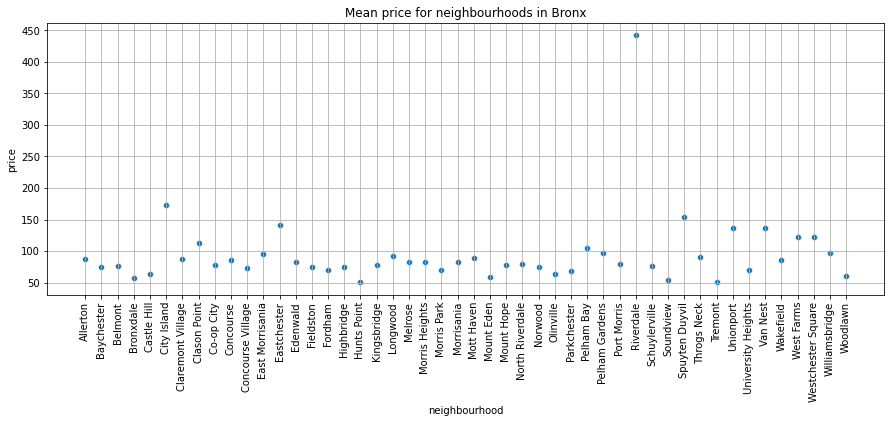

In [54]:
#Bronx
plt.figure(figsize=(15,5))
ax=sns.scatterplot(x='neighbourhood',y='price',data=bronx_most_exp_nbh)
plt.title('Mean price for neighbourhoods in Bronx')
plt.xticks(rotation=90)
plt.grid()
ax.plot()

**The most expensive neighbourhood in Bronx is Riverdale.**

# **CONCLUSION**


>  Entire home/apt is the most expensive room type and yet gets the most traffic.

> Private rooms are the second highest in terms of booking, which suggests people value their privacy

> Manhattan is the most expensive neighbourhood group, and Brooklyn gets the most traffic.

> Price has a moderatively negative correlation with availability

> Sonder (NYC) is the most successful host, who only caters in Manhattan and only lists apartments and private room

 
  
  
   **Most expensive neighbourhoods**


> The most expensive neighbourhood in Brooklyn is Sea Gate.

> The most expensive neighbourhood in Manhattan is Tribeca.

> The most expensive neighbourhood in Queens is Neponsit.

> The most expensive neighbourhood in Staten Island is Fort Wadsworth.

> The most expensive neighbourhood in Bronx is Riverdale.

















